# Import Dependencies

In [55]:
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [56]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [57]:
a = df[(df['koi_disposition']=='CANDIDATE') | (df['koi_disposition']=='FALSE POSITIVE')]
a.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
11,FALSE POSITIVE,0,1,0,0,11.521446,1.980000e-06,-1.980000e-06,170.839688,0.000131,...,-172,4.554,0.033,-0.176,0.848,0.224,-0.075,297.07993,47.597401,15.472
12,FALSE POSITIVE,0,1,0,0,19.221389,1.120000e-06,-1.120000e-06,184.552164,0.000045,...,-200,4.496,0.052,-0.208,0.947,0.308,-0.096,295.81454,47.690350,15.341
13,FALSE POSITIVE,0,1,0,0,16.469838,1.360000e-05,-1.360000e-05,180.881761,0.000623,...,-153,4.517,0.088,-0.072,0.786,0.088,-0.088,297.15442,47.668701,15.788


# Select features (columns)

In [59]:
columns1= ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 
       'koi_time0bk', 'koi_impact',
       'koi_duration',
       'koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 
        'koi_slogg', 
       'koi_srad', 'ra', 'dec',
       'koi_kepmag']
df1 = a[columns1]
df1.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
11,FALSE POSITIVE,0,1,0,0,11.521446,170.839688,2.483,3.63990,17984.0,...,753,75.88,622.1,1,5795,4.554,0.848,297.07993,47.597401,15.472
12,FALSE POSITIVE,0,1,0,0,19.221389,184.552164,1.065,4.79843,74284.0,...,698,55.97,2317.0,1,6117,4.496,0.947,295.81454,47.690350,15.341
13,FALSE POSITIVE,0,1,0,0,16.469838,180.881761,0.292,9.43780,10479.0,...,595,29.61,303.4,1,5152,4.517,0.786,297.15442,47.668701,15.788


In [60]:
#Use `koi_disposition` for the y values

X = df1.drop('koi_disposition', axis=1)
y = df1['koi_disposition']#.values.reshape(-1,1)
print(X.shape, y.shape)

(5191, 20) (5191,)


# Create a Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [62]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the model

k: 1, Train/Test Score: 1.000/0.989
k: 3, Train/Test Score: 0.995/0.995
k: 5, Train/Test Score: 0.995/0.995
k: 7, Train/Test Score: 0.995/0.995
k: 9, Train/Test Score: 0.995/0.995
k: 11, Train/Test Score: 0.995/0.995
k: 13, Train/Test Score: 0.995/0.995
k: 15, Train/Test Score: 0.995/0.995
k: 17, Train/Test Score: 0.995/0.995
k: 19, Train/Test Score: 0.995/0.995
k: 21, Train/Test Score: 0.995/0.995
k: 23, Train/Test Score: 0.995/0.995
k: 25, Train/Test Score: 0.995/0.995
k: 27, Train/Test Score: 0.995/0.995
k: 29, Train/Test Score: 0.995/0.995
k: 31, Train/Test Score: 0.995/0.995
k: 33, Train/Test Score: 0.995/0.995
k: 35, Train/Test Score: 0.995/0.995
k: 37, Train/Test Score: 0.995/0.995
k: 39, Train/Test Score: 0.995/0.995
k: 41, Train/Test Score: 0.995/0.995
k: 43, Train/Test Score: 0.995/0.995
k: 45, Train/Test Score: 0.995/0.995
k: 47, Train/Test Score: 0.995/0.995
k: 49, Train/Test Score: 0.995/0.995
k: 51, Train/Test Score: 0.995/0.995
k: 53, Train/Test Score: 0.995/0.995
k: 55,

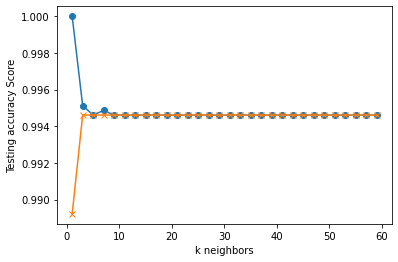

In [63]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [64]:
model = KNeighborsClassifier(n_neighbors=3)

In [65]:
model.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9951194451579759
Testing Data Score: 0.9946070878274268


In [66]:
predictions = model.predict(X_test_scaled)

In [67]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE'
 'CANDIDATE' 'CANDIDATE']
First 10 Actual labels: ['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE']


In [68]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CANDIDATE,CANDIDATE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1293,CANDIDATE,CANDIDATE
1294,FALSE POSITIVE,FALSE POSITIVE
1295,FALSE POSITIVE,FALSE POSITIVE
1296,CANDIDATE,CANDIDATE


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                target_names=['CANDIDATE',  'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.99      1.00      0.99       422
FALSE POSITIVE       1.00      0.99      1.00       876

      accuracy                           0.99      1298
     macro avg       0.99      0.99      0.99      1298
  weighted avg       0.99      0.99      0.99      1298



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [ 1,3,5,7,9,11,13,15,17,19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(model, param_grid, verbose=3, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    0.8s finished


In [78]:
print("Best params :", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best score:  0.7477537947592703


In [80]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                target_names=['CANDIDATE',  'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00       422
FALSE POSITIVE       0.67      1.00      0.81       876

      accuracy                           0.67      1298
     macro avg       0.34      0.50      0.40      1298
  weighted avg       0.46      0.67      0.54      1298



In [79]:
param_grid1 = {
    'n_neighbors': [11],
    'weights': ['uniform'],
    'metric': ['manhattan']}
grid1 = GridSearchCV(model, param_grid1, verbose=3, cv=3, n_jobs=-1)
grid_result1 = grid1.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [81]:
# Make predictions with the hypertuned model
predictions = grid1.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                target_names=['CANDIDATE',  'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00       422
FALSE POSITIVE       0.67      1.00      0.81       876

      accuracy                           0.67      1298
     macro avg       0.34      0.50      0.40      1298
  weighted avg       0.46      0.67      0.54      1298



In [84]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN on data: ",accuracy_score(y_test,predictions))

Accuracy for KNN on data:  0.674884437596302


In [83]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'KNNmodel.sav'
joblib.dump(model, filename)

['KNNmodel.sav']